## Inference Inspect

In [9]:
import numpy as np
import pickle

import engine
import model
import utils
import train

In [10]:
# Load training text to recover vocab and vocab_size, since we don't store them externally
text = train.prepare_input("data/shakespeare.txt")
encoded_data, vocab = train.tokenize_data(text)
vocab_size = len(vocab)

# Load pretrained weights
with open("./out/weights.pkl", "rb") as f:
    params = pickle.load(f)
print("Weights loaded from weights.pkl")
output_text = "ROMEO: "
viz_info = {}

# Initial prompt (context):
if 'output_text' not in locals():
    output_text = "ROMEO: "
    viz_info = {}

Weights loaded from weights.pkl


Context: ROMEO: how, t

Top candidates (softmax):
  'h': 93.63%  <--- Selected
  'o': 3.89% 
  'e': 1.18% 
  'i': 0.77% 
  'r': 0.28% 

Infered character: 'h'

Generated text:
ROMEO: how, th



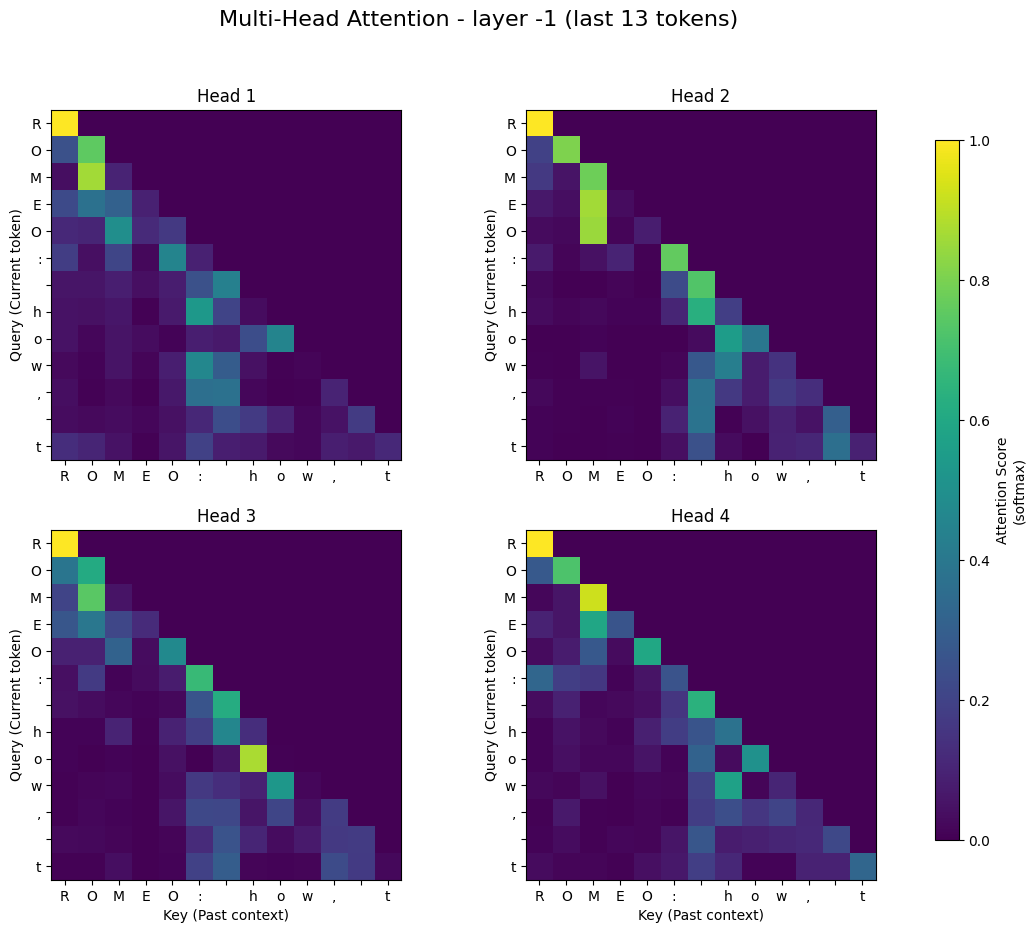

In [17]:
# Step-by-Step Autoregressive Inference

print(f"Context: {output_text}")

# Create a token based on the current context
# We only request ONE token for a step-by-step view (max_new_tokens=1)
gen = model.generate_stream(
    output_text, vocab, params, 
    max_new_tokens=1, 
    temperature=0.8, 
    k=10, 
    out_info=viz_info
)

# Run the inference
new_char = next(gen)
output_text += new_char

if "probs" in viz_info:
    p = viz_info["probs"]
    # Get indices of the top 5 probabilities
    top_5_idx = np.argsort(p)[-5:][::-1]
    
    print("\nTop candidates (softmax):")
    for i in top_5_idx:
        char = utils.decode([i], vocab)
        prob = p[i]
        # Clean up newline display
        display_char = char.replace("\n", "\\n")
        marker = " <--- Selected" if char == new_char else ""
        print(f"  '{display_char}': {prob:.2%} {marker}")

print(f"\nInfered character: '{new_char}'\n")
print(f"Generated text:\n{output_text}\n")

# Multi-head Attention Visualization
utils.plot_multi_head_attention(vocab, viz_info)